>Алексей, приветствую! Меня зовут Кудрявцев Александр и я буду проверять твой проект.
>
>Если ты непротив, мне было бы удобнее общаться на "ты" во время проверки проекта :)
>
>Ниже в ноутбуке будут мои комментарии, закодированные разными цветами.
>
>**_<span style="color:green">Зеленым будут выделены места, которые хочется особенно отметить, как хорошие. </span>_**
>
> **_<span style="color:red">Недочеты, откомментированные красным обязательны к доработке – без их исправления проект не будет зачтен. </span>_**
>  
> **_<span style="color:orange">Недочеты и подсказки, откомментированные оранжевым, учесть желательно, но их доработка не является обязательным условнием для зачета.</span>_**
>
> Если какие-то подзадачи не откомментированны – значит с ними все окей, нет возражений.
>
> Если ошибка влечет за собой дальнейшие неточности рассчетов или выводов – пожалуйста, поправь их тоже, чтобы аналитический отчет был целостным.
>
>Пожалуйста, не удаляй и не переноси мои комментарии, это позволит лучше ориентироваться при возможных повторных проверках.

<a id='top'></a>
<img align="center" src="https://geektech.me/wp-content/uploads/2020/09/3a9e9088aaaa1240017630bfbef872e9.png" width="200" />

<p style="text-align: center;">
    <font size='5' type='bold'>
        <b>Определение перспективного тарифа для телеком компании</b>
    </font>
</p>

### Содержание

<a href='#section_0'>Задачи проекта</a>

<a href='#section_i'>I. Общая информация о данных</a>
* <a href='#section_i_1'>Информация о пользователях</a>
* <a href='#section_i_2'>Информация о звонках</a>
* <a href='#section_i_3'>Информация о сообщениях</a>
* <a href='#section_i_4'>Информация об интернет-сессиях</a>
* <a href='#section_i_5'>Информация о тарифах</a>

<a href='#section_ii'>II. Предобработка данных</a>
    
<a href='#section_iii'>III. Добавление рассчетных данных</a>
* <a href='#section_iii_1'>Расчет количества сделанных звонков и израсходованных минут разговора по месяцам</a>
* <a href='#section_iii_2'>Расчет количества отправленных сообщений по месяцам</a>
* <a href='#section_iii_3'>Расчет объема израсходованного интернет-трафика по месяцам</a>
* <a href='#section_iii_4'>Расчет помесячной выручки с каждого пользователя</a>
    
<a href='#section_iv'>IV. Статистический анализ данных</a>

<a href='#section_v'>V. Проверка гипотез</a>
* <a href='#section_v_1'>Гипотеза о равенстве средних двух генеральных совокупностей №1 (зависимость выручки от тарифа)</a>
* <a href='#section_v_2'>Гипотеза о равенстве средних двух генеральных совокупностей №2 (зависимость выручки от региона)</a>
    
<a href='#section_vi'>VI. Общий вывод</a>
    
<a href='#section_end'>Чек-лист готовности проекта</a>


>**_<span style="color:green">Оглавление в тетрадках jupyter notebook — отличная практика. Так держать! :) </span>_**


<a id='section_0'></a>
### Задачи проекта.
Клиентам "Мегалайн" предлагают два тарифных плана: *«Смарт»* и *«Ультра»*. Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.
Вам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В вашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

---
<div style="border:solid purple 1px; padding: 10px">

*Тариф «Смарт»*
    
* Ежемесячная плата: **550 рублей**
* Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
* Стоимость услуг сверх тарифного пакета:
    - минута разговора: 3 рубля
    - сообщение: 3 рубля
    - 1 Гб интернет-трафика: 200 рублей
</div>   

<div style="border:solid purple 1px; padding: 10px">

*Тариф «Ультра»*
* Ежемесячная плата: **1950 рублей**
* Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
* Стоимость услуг сверх тарифного пакета:
    - минута разговора: 1 рубль
    - сообщение: 1 рубль
    - 1 Гб интернет-трафика: 150 рублей
</div>
---

<a href='#top'>Back to top</a>

<a id='section_i'></a>
### I. Общая информации о данных

Импортируем необходимые для работы библиотеки.

In [1]:
import pandas as pd # <импорт библиотеки pandas>
import numpy as np # <импорт библиотеки NumPy>
import seaborn as sns # <импорт библиотеки Seaborn>
import matplotlib.pyplot as plt # <импорт коллекции Pyplot библиотеки Matplotlib>
import pylab as pl # <импорт модуля PyLab>
from datetime import datetime as dt # <импорт модуля datetime>
from scipy import stats as st # <импорт модуля stats>

Изучим данные, предоставленные Заказчиком для проекта. Прочитаем файлы и сохраним их в переменных.

In [2]:
users_data = 'C:/Users/aleks/OneDrive/MyBackup/edu_ds_13 (Yandex)/03_Portfolio/04_Mobile Phone Tariffs_project/users.csv'
calls_data = 'C:/Users/aleks/OneDrive/MyBackup/edu_ds_13 (Yandex)/03_Portfolio/04_Mobile Phone Tariffs_project/calls.csv'
messages_data = 'C:/Users/aleks/OneDrive/MyBackup/edu_ds_13 (Yandex)/03_Portfolio/04_Mobile Phone Tariffs_project/messages.csv'
internet_data = 'C:/Users/aleks/OneDrive/MyBackup/edu_ds_13 (Yandex)/03_Portfolio/04_Mobile Phone Tariffs_project/internet.csv'
tariffs_data = 'C:/Users/aleks/OneDrive/MyBackup/edu_ds_13 (Yandex)/03_Portfolio/04_Mobile Phone Tariffs_project/tariffs.csv'

df_u = pd.read_csv(users_data)
df_c = pd.read_csv(calls_data)
df_m = pd.read_csv(messages_data)
df_i = pd.read_csv(internet_data)
df_t = pd.read_csv(tariffs_data)

Посмотрим на данные таблиц, и выведем общую информацию о составе данных, применив метод `info`. Также посмотрим на сводную статистику по данным, представленным в числовом виде, применив метод `describe`.

<a id='section_i_1'></a>
<div style="border:solid green 2px; padding: 10px">
    <b>Информация о пользователях</b>

In [3]:
df_u.head(3)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart


In [4]:
df_u.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [5]:
df_u.describe()

,user_id,age
count,500.000000,500.00000
mean,1249.500000,46.58800
std,144.481833,16.66763
min,1000.000000,18.00000
25%,1124.750000,32.00000
50%,1249.500000,46.00000
75%,1374.250000,62.00000
max,1499.000000,75.00000


Таблица *df_u* (информация о пользователях) содержит следующие данные:
- **user_id** — уникальный идентификатор пользователя
- **first_name** — имя пользователя
- **last_name** — фамилия пользователя
- **age** — возраст пользователя (годы)
- **reg_date** — дата подключения тарифа (день, месяц, год)
- **churn_date** — дата прекращения пользования тарифом
- **city** — город проживания пользователя
- **tariff** — название тарифного плана

Всего в таблице 8 столбцов, типы данных: 
- **строки** у 5 столбцов
- **целые числа** у 2 столбцов
- **вещественные числа** (с "плавающей" точкой) у 1

Пропуски представлены только в колонке *churn_date*. По информации от маркетинговой службы, если значение пропущено, то тариф ещё действовал на момент выгрузки данных. Данные представлены полно и ровно, без явных "выбросов". Возраст клиентов варьируется от 18 до 75 лет. К последующей предобработке данных мы вернемся в следующем разделе.

<a id='section_i_2'></a>
<div style="border:solid green 2px; padding: 10px">
    <b>Информация о звонках</b>

In [6]:
df_c.head(3)

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000


In [7]:
df_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [8]:
df_c.describe()

,duration,user_id
count,202607.000000,202607.000000
mean,6.755887,1253.940619
std,5.843365,144.722751
min,0.000000,1000.000000
25%,1.300000,1126.000000
50%,6.000000,1260.000000
75%,10.700000,1379.000000
max,38.000000,1499.000000


Таблица *df_с* (информация о звонках) содержит следующие данные:
- **id** — уникальный номер звонка
- **call_date** — дата звонка
- **duration** — длительность звонка в минутах
- **user_id** — идентификатор пользователя, сделавшего звонок

Всего в таблице 4 столбца, типы данных: 
- **строки** у 2 столбцов
- **целые числа** у 1 столбца
- **вещественные числа** также у 1

Пропусков нет. Данные представлены полно и ровно, без явных "выбросов". Время звонков варьируется от 0 до 38 минут.

<a id='section_i_3'></a>
<div style="border:solid green 2px; padding: 10px">
    <b>Информация о сообщениях</b>

In [9]:
df_m.head(3)

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000


In [10]:
df_m.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


Таблица *df_m* (информация о сообщениях) содержит следующие данные:
- **id** — уникальный номер сообщения
- **message_date** — дата сообщения
- **user_id** — идентификатор пользователя, отправившего сообщение

Всего в таблице 3 столбца, типы данных: 
- **строки** у 2 столбцов
- **целые числа** у 1

Пропусков нет. В вызове метода `describe` нет необходимости, так как числовой тип данных представлен только по *user_id*.

<a id='section_i_4'></a>
<div style="border:solid green 2px; padding: 10px">
    <b>Информация об интернет-сессиях</b>

In [11]:
df_i.head(3)

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000


In [12]:
df_i.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


In [13]:
df_i.describe()

,Unnamed: 0,mb_used,user_id
count,149396.000000,149396.000000,149396.000000
mean,74697.500000,370.192426,1252.099842
std,43127.054745,278.300951,144.050823
min,0.000000,0.000000,1000.000000
25%,37348.750000,138.187500,1130.000000
50%,74697.500000,348.015000,1251.000000
75%,112046.250000,559.552500,1380.000000
max,149395.000000,1724.830000,1499.000000


Таблица *df_i* (информация об интернет-сессиях) содержит следующие данные:
- **id** — уникальный номер сессии
- **mb_used** — объём потраченного за сессию интернет-трафика (в мегабайтах)
- **session_date** — дата интернет-сессии
- **user_id** — идентификатор пользователя

Всего в таблице 5 столбцов, типы данных: 
- **строки** у 2 столбцов
- **целые числа** у 2 столбцов
- **вещественные числа** у 1.

Пропусков нет. Данные представлены полно и ровно, без явных "выбросов". Трафик одной интернет-сессии варьируется от 0 до 1.7 Гб.

<a id='section_i_5'></a>
<div style="border:solid green 2px; padding: 10px">
    <b>Информация о тарифах</b>

In [14]:
df_t.head(3)

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


Таблица *df_t* (информация о тарифах) содержит следующие данные:
- **tariff_name** — название тарифа
- **rub_monthly_fee** — ежемесячная абонентская плата в рублях
- **minutes_included** — количество минут разговора в месяц, включённых в абонентскую плату
- **messages_included** — количество сообщений в месяц, включённых в абонентскую плату
- **mb_per_month_included** — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
- **rub_per_minute** — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
- **rub_per_message** — стоимость отправки сообщения сверх тарифного пакета
- **rub_per_gb** — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

Таблица по размеру не большая, что и логично, так как это всего лишь информация о тарифах. Составителю такого рода сводных данных сложно ошибиться в цифрах, если перед отправкой аналитикам нужно проверить всего две строки.

<a href='#top'>Back to top</a>


>**_<span style="color:green">Здесь всё структурировано и по делу, класс. </span>_**
>


<a id='section_ii'></a>
### II. Предобработка данных

Предварительный разбор данных на [этапе знакомства с данными](#section_i) показал следующие очевидные недостатки в данных:
- Даты в соответствующих таблицах не представлены в виде объектов даты-времени
- В таблице со звонками (столбец *duration*) и в таблице с интернет-сессиями (столбец *mb_used*) значения дробные и не представлены в виде целочисленных объектов. Так как «Мегалайн» всегда округляет вверх значения минут и мегабайтов, то, если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута, а значит и платить пользователь будет за 1 целую минуту или 1 полный мегабайт.
- В таблице с интернет сессиями столбец Unnamed:0 дублирует индекс строки каждой записи

Исправим вышеуказанные недочеты.

In [15]:
# применим метод to_datetime
df_u['churn_date'] = pd.to_datetime(df_u['churn_date'], format="%Y-%m-%d")
df_u['reg_date'] = pd.to_datetime(df_u['reg_date'], format="%Y-%m-%d")
df_c['call_date'] = pd.to_datetime(df_c['call_date'], format="%Y-%m-%d")
df_m['message_date'] = pd.to_datetime(df_m['message_date'], format="%Y-%m-%d")
df_i['session_date'] = pd.to_datetime(df_i['session_date'], format="%Y-%m-%d")

# применим метод ceil (для округления вверх - до 1 мин и до 1 МБ) 
# и astype (для перевода в целочисленный тип)
df_c['duration'] = df_c['duration'].apply(np.ceil).astype('int')
df_i['mb_used'] = df_i['mb_used'].apply(np.ceil).astype('int')

# удалим столбец Unnamed: 0
df_i = df_i.drop(columns=['Unnamed: 0'])

Обратим внимание, что длительность многих звонков — 0.00 минут. Посмотрим на количество нулевых значений в столбце *duration* таблицы со звонками.

In [16]:
df_c.query('duration == 0')['duration'].count() / df_c['duration'].count()

0.19551644316336553

Как видно, практически пятая часть всех данных о звонках имеет нулевые значения по продолжительности. Скорее всего это пропущенные звонки, так как 1 тарифицируемая секунда, за которую пользователь должен будет заплатить, как за минуту разговора, в масштабе минуты начинается с 0.02 (количество минут в одной секунде). Чтобы сохранить качество данных оставим эти нулевые значения без изменений.

Теперь можно заняться обогащением данных, добавив дополнительные расчеты, которые пригодятся при проведении статистического анализа.

<a href='#top'>Back to top</a>


>**_<span style="color:green">Здесь тоже ноль замечаний. Отдельно отмечу твой комплексный подход по предобработке данных. </span>_**


<a id='section_iii'></a>
### III. Добавление рассчетных данных

<a id='section_iii_1'></a>
<div style="border:solid green 2px; padding: 10px">
    <b>Расчет количества сделанных звонков и израсходованных минут разговора по месяцам</b>

In [17]:
# добавим в таблицу df_c колонку с указанием месяца
# так будет проще делать группировку
df_c['month'] = df_c['call_date'].dt.month

# сгруппируем таблицу по user_id и месяцам
# методом agg применим к столбцам duration и id
# методы подсчета суммы и количества значений соответственно
df_c_monthly = df_c.groupby(['user_id', 'month'])\
                   .agg({'duration': 'sum', 'id': 'count'}).reset_index()

# переименуем столбцы duration и id в расчетной таблице df_c_monthly
df_c_monthly = df_c_monthly.rename(columns={'duration': 'duration_per_month',
                                            'id': 'calls_per_month'})
df_c_monthly.head(3)

,user_id,month,duration_per_month,calls_per_month
0,1000,5,159,22
1,1000,6,172,43
2,1000,7,340,47


<a id='section_iii_2'></a>
<div style="border:solid green 2px; padding: 10px">
    <b>Расчет количества отправленных сообщений по месяцам</b>

In [18]:
# добавим в таблицу df_m колонку с указанием месяца
df_m['month'] = df_m['message_date'].dt.month

# сгруппируем таблицу по user_id и месяцам
# методом agg применим к столбцу id метод подсчета количества значений
df_m_monthly = df_m.groupby(['user_id', 'month'])\
                   .agg({'id': 'count'}).reset_index()

# переименуем столбец id в расчетной таблице df_m_monthly
df_m_monthly = df_m_monthly.rename(columns={'id': 'messages_per_month'})
df_m_monthly.head(3)

,user_id,month,messages_per_month
0,1000,5,22
1,1000,6,60
2,1000,7,75


<a id='section_iii_3'></a>
<div style="border:solid green 2px; padding: 10px">
    <b>Расчет объема израсходованного интернет-трафика по месяцам</b>

In [19]:
# добавим в таблицу df_i колонку с указанием месяца
df_i['month'] = df_i['session_date'].dt.month

# сгруппируем таблицу по user_id и месяцам
# методом agg применим к столбцам mb_used и id метод подсчета количества значений
df_i_monthly = df_i.groupby(['user_id', 'month'])\
                   .agg({'mb_used': 'sum', 'id': 'count'}).reset_index()

# переименуем столбцы duration и id в расчетной таблице df_i_monthly
df_i_monthly = df_i_monthly.rename(columns={'mb_used': 'mb_used_per_month',
                                            'id': 'sessions_per_month'})

df_i_monthly.head(3)

,user_id,month,mb_used_per_month,sessions_per_month
0,1000,5,2256,5
1,1000,6,23257,49
2,1000,7,14016,29


<a id='section_iii_4'></a>
<div style="border:solid green 2px; padding: 10px">
    <b>Расчет помесячной выручки с каждого пользователя </b>

Для расчета помесячной выручки сперва объединим сгруппированные таблицы (по звонкам, сообщениям и интернету).

In [20]:
# объединим таблицы со сгруппированными звонками и сообщениями
df = df_c_monthly.merge(df_m_monthly, on=['user_id','month'], how='outer')

# объединим получившуюся таблицу с таблицей со сгруппированным интернетом
df = df.merge(df_i_monthly, on=['user_id','month'], how='outer')

df.head(3)

,user_id,month,duration_per_month,calls_per_month,messages_per_month,mb_used_per_month,sessions_per_month
0,1000,5,159.0,22.0,22.0,2256.0,5.0
1,1000,6,172.0,43.0,60.0,23257.0,49.0
2,1000,7,340.0,47.0,75.0,14016.0,29.0


Теперь добавим пользователей и условия тарифа.

In [21]:
# добавим в сводную таблицу данные таблицы df_u
df = df.merge(df_u, on='user_id', how='left')

# перед объединением таблиц df и df_t
# переименуем столбец tariff в tariff_name
df = df.rename(columns={'tariff': 'tariff_name'})

#объединим таблицы
df = df.merge(df_t, on='tariff_name', how='left')

df.head(3)

,user_id,month,duration_per_month,calls_per_month,messages_per_month,mb_used_per_month,sessions_per_month,age,churn_date,city,...,last_name,reg_date,tariff_name,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,5,159.0,22.0,22.0,2256.0,5.0,52,NaT,Краснодар,...,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
1,1000,6,172.0,43.0,60.0,23257.0,49.0,52,NaT,Краснодар,...,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
2,1000,7,340.0,47.0,75.0,14016.0,29.0,52,NaT,Краснодар,...,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1


In [22]:
# посмотрим на пропуски
df.isna().sum()

user_id                     0
month                       0
duration_per_month         40
calls_per_month            40
messages_per_month        497
mb_used_per_month          11
sessions_per_month         11
age                         0
churn_date               3027
city                        0
first_name                  0
last_name                   0
reg_date                    0
tariff_name                 0
messages_included           0
mb_per_month_included       0
minutes_included            0
rub_monthly_fee             0
rub_per_gb                  0
rub_per_message             0
rub_per_minute              0
dtype: int64

In [23]:
# Очевидно пропуски эквивалентны отстутсвию активности пользователей,
# а не потерей данных. Заменим пропущенные значения на 0
# Пропуски в датах прекращения пользованием тарифом не повлияют на анализ
df['duration_per_month'] = df['duration_per_month'].fillna(0)
df['calls_per_month'] = df['calls_per_month'].fillna(0)
df['messages_per_month'] = df['messages_per_month'].fillna(0)
df['mb_used_per_month'] = df['mb_used_per_month'].fillna(0)
df['sessions_per_month'] = df['sessions_per_month'].fillna(0)

df.isna().sum()

user_id                     0
month                       0
duration_per_month          0
calls_per_month             0
messages_per_month          0
mb_used_per_month           0
sessions_per_month          0
age                         0
churn_date               3027
city                        0
first_name                  0
last_name                   0
reg_date                    0
tariff_name                 0
messages_included           0
mb_per_month_included       0
minutes_included            0
rub_monthly_fee             0
rub_per_gb                  0
rub_per_message             0
rub_per_minute              0
dtype: int64


>**_<span style="color:green">По агрегации данных и объединению таблиц у тебя полный порядок. Молодец что используешь метод `outer` при объединении таблиц по звонкам, сообщениям и трафике. Это позволило тебе учесть всех пользователей, даже если они не пользовались какой-либо из услуг в рамках одного месяца. Напрмер, пользователь может пользоваться планшетом - не совершать звонки, но при этом активно использовать интернет и т.д. </span>_**


Сводная таблица готова. Далее добавим в таблицу помесячную выручку с каждого пользователя.

In [24]:
# вычтем бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика
# остатки умножим на значения стоимости из тарифного плана
def above_tariff(row):
    internet = (row['mb_used_per_month'] - row['mb_per_month_included']) * row['rub_per_gb'] / 1000
    messages = (row['messages_per_month'] - row['messages_included']) * row['rub_per_message']
    calls = (row['duration_per_month'] - row['minutes_included']) * row['rub_per_minute']
    total = 0
    for i in [internet, messages, calls]:
        if i > 0:
            total += i
    return total

# прибавим абонентскую плату, соответствующую тарифному плану
df['revenue_per_month'] = df.apply(lambda x: above_tariff(x), axis=1) + df['rub_monthly_fee']

# посмотрим топ-3 пользователей по переплате
df.sort_values(by='revenue_per_month', ascending = False).head(3)

,user_id,month,duration_per_month,calls_per_month,messages_per_month,mb_used_per_month,sessions_per_month,age,churn_date,city,...,reg_date,tariff_name,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,revenue_per_month
3106,1486,12,1007.0,133.0,83.0,38610.0,118.0,35,NaT,Нижний Новгород,...,2018-10-31,smart,50,15360,500,550,200,3,3,6820.0
1622,1261,12,1074.0,141.0,22.0,32697.0,114.0,46,NaT,Казань,...,2018-10-30,smart,50,15360,500,550,200,3,3,5739.4
260,1042,12,728.0,121.0,75.0,37219.0,112.0,42,NaT,Хабаровск,...,2018-11-25,smart,50,15360,500,550,200,3,3,5680.8


### Вывод
На первый взгляд тарифы достаточно выгодные для пользователей, однако находятся клиенты, которые платят в 10 раз больше за услуги связи. Перейдем к анализу.

<a href='#top'>Back to top</a>


>**_<span style="color:green">Красивое решение с функцией строк для подсчёта выручки. Так держать! :) </span>_**
>
>**_<span style="color:red">~~Маленькая неточность: ты делишь мегабайты на 1000, а надо было на 1024.~~ </span>_**
>
>**_<span style="color:blue">А вот я тоже так думал, ан нет)) Для людей гигабайты сделали кратными 1000, а вот ИТ-экспертам с их 1024 в 1998 году придумали новое слово - Гибибайт. Теперь надо с этим как-то жить =)</span>_**
>
>>**_<span style="color:green">Update: Да, мне это известно, но в данном моменте я больше опираюсь на условия задания и общепринятую практику.</span>_**

<a id='section_iv'></a>
### IV. Статистический анализ данных
Посмотрим на общую картину распределения пользователей тарифов услуг связи.

In [25]:
df['tariff_name'].value_counts()

smart    2229
ultra     985
Name: tariff_name, dtype: int64

In [26]:
df.query('tariff_name == "smart"')['revenue_per_month'].describe()

count    2229.000000
mean     1246.336653
std       803.671482
min       550.000000
25%       550.000000
50%       967.200000
75%      1686.400000
max      6820.000000
Name: revenue_per_month, dtype: float64

In [27]:
df.query('tariff_name == "ultra"')['revenue_per_month'].describe()

count     985.000000
mean     2063.182690
std       364.856367
min      1950.000000
25%      1950.000000
50%      1950.000000
75%      1950.000000
max      4810.350000
Name: revenue_per_month, dtype: float64

Text(0.5, 0.98, 'Tariff Comparison')

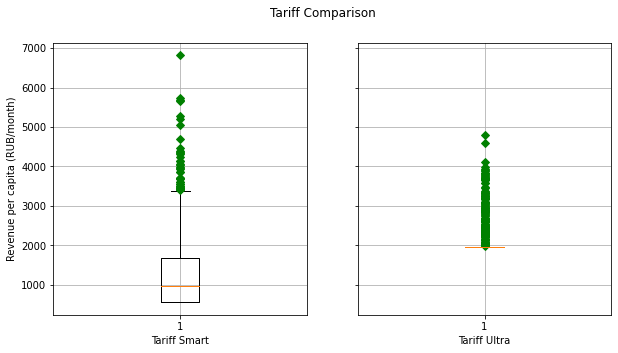

In [28]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5), sharey=True)

ax[0].boxplot(df.query('tariff_name == "smart"')['revenue_per_month'], 0, 'gD')
ax[1].boxplot(df.query('tariff_name == "ultra"')['revenue_per_month'], 0, 'gD')

ax[0].set_xlabel("Tariff Smart")
ax[1].set_xlabel("Tariff Ultra")
ax[0].set_ylabel("Revenue per capita (RUB/month)")

ax[0].grid()
ax[1].grid()

fig.suptitle("Tariff Comparison")

Как видно из таблицы и диаграмм разброса пользователи услуг ведут себя по-разному:
* Пользователи тарифа *Смарт* приносят компании прибыли больше размера установленной абонентской платы в 550 рублей. Медианное значение находится на уровне 967 рублей в месяц, а значит большинство пользователей стабильно переплачивает за тариф.
* Большинство пользователей тарифа *Ультра*, напротив, редко приносят дополнительную выручку компании, оставаясь в рамках абонентской платы в 1950 рублей.

Рассмотрим более детально сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц. Посчитаем среднее количество, дисперсию и стандартное отклонение.

In [29]:
df.groupby('tariff_name')\
  .agg({'duration_per_month':['mean','var','std'],\
        'messages_per_month':['mean','var','std'],\
        'mb_used_per_month':['mean','var','std']})\
        .style.format("{:.0f}")

Построим гистограммы

Text(0.5, 0.98, 'General Tariff Usage')

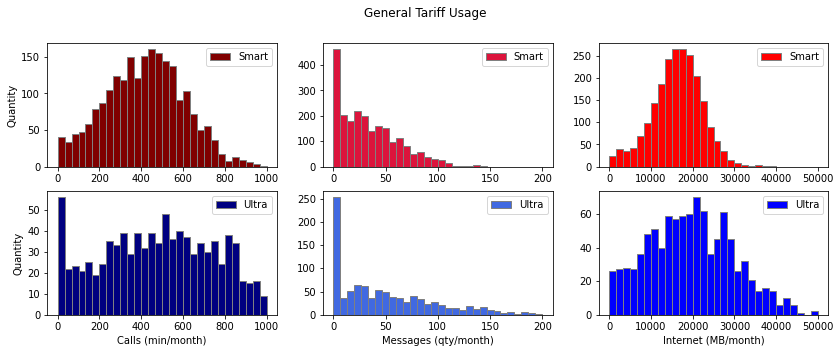

In [30]:
fig, ((axs_1, axs_2, axs_3), (axu_1, axu_2, axu_3)) = plt.subplots(nrows=2, ncols=3, figsize=(14, 5))

axs_1.hist(df[df['tariff_name'] == 'smart']['duration_per_month'], bins=30, range=(0, 1000), color='maroon', ec='grey', label='Smart')
axs_2.hist(df[df['tariff_name'] == 'smart']['messages_per_month'], bins=30, range=(0, 200), color='crimson', ec='grey', label='Smart')
axs_3.hist(df[df['tariff_name'] == 'smart']['mb_used_per_month'], bins=30, range=(0, 50000), color='red', ec='grey', label='Smart')
axu_1.hist(df[df['tariff_name'] == 'ultra']['duration_per_month'], bins=30, range=(0, 1000), color='navy', ec='grey', label='Ultra')
axu_2.hist(df[df['tariff_name'] == 'ultra']['messages_per_month'], bins=30, range=(0, 200), color='royalblue', ec='grey', label='Ultra')
axu_3.hist(df[df['tariff_name'] == 'ultra']['mb_used_per_month'], bins=30, range=(0, 50000), color='blue', ec='grey', label='Ultra')

axs_1.legend(loc='upper right')
axs_2.legend(loc='upper right')
axs_3.legend(loc='upper right')
axu_1.legend(loc='upper right')
axu_2.legend(loc='upper right')
axu_3.legend(loc='upper right')

axu_1.set_xlabel("Calls (min/month)")
axu_2.set_xlabel("Messages (qty/month)")
axu_3.set_xlabel("Internet (MB/month)")
axs_1.set_ylabel("Quantity")
axu_1.set_ylabel("Quantity")

fig.suptitle("General Tariff Usage")

Как видно из представленных распределений, привычки пользователей примерно одинаковы. В среднем клиенты предпочитают звонить до 500 мин в месяц, отправлять не более 50 сообщений и использовать до 20 ГБ интернет-трафика. Однако, клиенты тарифа *Ультра* (по всей видимости из-за меньших ограничений тарифа) склонны расходовать чуть больше минут, сообщений и трафика.

Датасет по количеству звонков тарифа *Смарт* имеет незначительную скошенность в отрицательную сторону. Скорее всего это связано с осторожностью пользователей, чтобы не выйти за пределы предоставленных 500 минут согласно тарифа. Пользователи тарифа *Ультра*, практически не ограниченные в звонках, разговаривают по телефону более свободно, а небольшая отрицательная скошенность говорит скорее об общей тенденции людей по телефону говорить короче, и больше пользоваться социальными сетями в современном мире.

Гистограмма по сообщениям на обоих тарифах, показывает, что медиана меньше среднего, а значит данные скошены вправо. При этом мы имеем пик по количеству сообщений в районе 10 в месяц. Сообщения в виде смс при таком многообразии мессенджеров уже никого не привлекают. Более выраженная положительная скошенность на тарифе *Смарт* скорее говорит о том, что пользователи стремятся компенсировать экономию на звонках засчет сообщений.

Интернет-трафик по тарифу *Смарт* показывает практически нормальное распределение с пиком на уровне лимита по тарифу - 15 ГБ. Трафик намного дороже дополнительных минут и сообщений, здесь поведение пользователей объяснимо ровнее. На тарифе *Ультра* имеет место отрицательная скошенность данных, что говорит об общей статистике достаточности трафика в 15-20 ГБ для среднего пользователя страны на месяц. 

В целом можно рекомендовать на тарифе *Смарт* поднять количество ГБ трафика и минут звонков, и заодно накинуть к стоимости тарифа 50-100 рублей. Тариф *Ультра* можно оптимизировать засчет снижения количества минут и трафика, снизить абонентскую плату и тем самым привлечь больше клиентов из категории пользователей тарифа *Смарт* и получать больше прибыли.

<a href='#top'>Back to top</a>

>**_<span style="color:green">Здесь все очень и очень хорошо. С точки зрения стиля и нашей задачи сравнения поведения пользователей двух тарифов, твое решение построить гистограммы друг под другом выглядит крайне уместно и рационально. Получилось очень наглядно. В качестве альтернативы мы могли бы построить гистограммы с наложением друг на друга (используя параметр прозрачности `alpha`, чтобы они полностью не перекрывали друг друга). Также можно было бы вывести дополнительные вертикальные линии, которые бы отражали границу лимита по тому, или иному типу услуг. </span>_**
>
>**_<span style="color:red">~~В задании также требовалось описать полученные типы распределений. Добавь, пожалуйста.~~ </span>_**
>
>**_<span style="color:blue">Ok</span>_**

<a id='section_v'></a>
### V. Проверка гипотез
Проверим следующие гипотезы:
* средняя выручка пользователей тарифов «Ультра» и «Смарт» различается
* средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

Чтобы проверить гипотезу о равенстве среднего двух генеральных совокупностей по взятым из них выборкам, будем использовать t-критерий Стьюдента, так как сравниваемые выборки независимы между собой. Передадим методу параметры массивов с выборками, а также параметр *equal_var = False*, так как выборки взяты из отличных по параметрам совокупностей, судя по кардинально различающимся **дисперсиям** выборок. Таким образом дисперсия каждой выборки будет оценена по отдельности по значениям в каждой из двыборок. Так мы получим более точные результаты.

|      | Звонки Смарт| Звонки Ультра | Сообщения Смарт| Сообщения Ультра| Интернет Смарт| Интернет Ультра|
|:----------------------------|--------|---------|------|--------|-----------|----------|
| Среднее                     | 418    | 527     | 33   |  49    |  16229    | 19487    |
| Стандартное отклонение (Мб) | 36219  | 100874  | 797  |  2285  |  34545911 | 101935621|
| **Дисперсия**                   | **190**    | **318**    | **33**   |  **48**    |  **5878**     | **10096**    |


<a id='section_v_1'></a>
<div style="border:solid green 2px; padding: 10px">
    <b>Гипотеза о равенстве средних двух генеральных совокупностей №1<b/>

Сформулируем гипотезы:
- H0: выручка от пользователей тарифов *Ультра* и *Смарт* не различается
- H1: выручка от пользователей тарифов *Ультра* и *Смарт* различается

In [31]:
# разделим датасет по тарифам - Ультра и Смарт
ultra = df[df['tariff_name'] == 'ultra']
smart = df[df['tariff_name'] == 'smart']

# избавимся от выбросов с помощью функции del_outliers
def del_outliers(df, col, add_boxplot = 0, x = 10, y = 10):
    btm_quartile = df[col].quantile(0.25)                 
    top_quartile = df[col].quantile(0.75)
    interquartile = top_quartile - btm_quartile
    true_data_range = (df[col] >= (btm_quartile - 1.5*interquartile)) & (df[col] <= (top_quartile + 1.5*interquartile))
    if add_boxplot == 1:
        return df.loc[true_data_range].boxplot([col], figsize=(x,y))
    else:
        return df.loc[true_data_range]
    
ultra = del_outliers(ultra, 'revenue_per_month', 0)
ultra = ultra['revenue_per_month']
smart = del_outliers(smart, 'revenue_per_month', 0)
smart = smart['revenue_per_month']

In [32]:
# проверим гипотезу
alpha = .05 # критический уровень статистической значимости
            # если p-value окажется меньше него - отвергнем гипотезу

results_tariff = st.ttest_ind(ultra, smart, equal_var = False)

print('p-значение:', results_tariff.pvalue)

if (results_tariff.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 0.0
Отвергаем нулевую гипотезу


Полученное значение p-value говорит о том, что выручка от каждого из двух тарифов формируется по разному, несмотря на примерно одинаковое поведение пользователей.

<a id='section_v_2'></a>
<div style="border:solid green 2px; padding: 10px">
    <b>Гипотеза о равенстве средних двух генеральных совокупностей №2</b>

Сформулируем гипотезы:
* H0: средняя выручка от пользователей из Москвы не отличается от выручки пользователей из других регионов
* H1: средняя выручка от пользователей из Москвы отличается от выручки пользователей из других регионов

In [33]:
# разделим датасет по регионам - Москва и Россия
df['region'] = np.where(df['city'] == 'Москва', 'Москва', 'Россия')
moscow = df[df['region'] == 'Москва']
russia = df[df['region'] == 'Россия']

In [34]:
# избавимся от выбросов
moscow = del_outliers(moscow, 'revenue_per_month', 0)
moscow = moscow['revenue_per_month']
russia = del_outliers(russia, 'revenue_per_month', 0)
russia = russia['revenue_per_month']

# посмотрим на статистические параметры групп по регионам
df.groupby('region')\
  .agg({'revenue_per_month':['mean','var','std']})\
        .style.format("{:.0f}")

Здесь имеет смысл передать параметр *equal_var = True*, так как выборки взяты из схожих по параметрам совокупностей, что также косвенно подтверждается близкими дисперсиями выборок.

In [35]:
alpha = .05

results_region = st.ttest_ind(moscow, russia, equal_var = True)

print('p-значение:', results_region.pvalue)

if (results_region.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 0.25119567702901946
Не получилось отвергнуть нулевую гипотезу


Полученное значение p-value говорит о том, что различия в доходах от разных тарифов, зависят от того, является ли пользователь жителем столицы или не является.

<a href='#top'>Back to top</a>

>**_<span style="color:red">~~С формулировкой и проверкой гипотез у тебя в целом полный порядок, но нужно посчитать дисперсии наших выборок, и учесть это при проведении теста, передав в параметр `equal_var` соответствующее значение. Поправь, пожалуйста.~~ </span>_**
>
>**_<span style="color:blue">Ok</span>_**

<a id='section_vi'></a>
### VI. Общий вывод
**Предварительный анализ тарифов на небольшой выборке из 500 пользователей «Мегалайна» на тарифах *Смарт* и *Ультра* показал:**
* пользователи услуг ведут себя по-разному
* пользователи тарифа *Смарт* приносят компании прибыли больше размера установленной абонентской платы в 550 рублей. Медианное значение находится на уровне 967 рублей в месяц, а значит большинство пользователей стабильно выходит за рамки условий тарифа
* большинство пользователей тарифа *Ультра* редко приносят дополнительную выручку компании, оставаясь в рамках абонентской платы в 1950 рублей
* привычки пользователей примерно одинаковы: в среднем клиенты предпочитают звонить до 500 мин в месяц, отправлять не более 50 сообщений и использовать до 20 ГБ интернет-трафика
* клиенты тарифа *Ультра* склонны расходовать больше минут, сообщений и траффика
* тариф *Ультра* привлекателен для пользователей засчет большего количества звонков, сообщений и интернета по фиксированной цене
* тариф *Смарт* дает пользователям меньше свободы в общении, и очевидно выбирается клиентами, которые предпочитают экономить

**Основные выводы после проверки статистических гипотез:**
* выручка от каждого из двух тарифов формируется по разному, несмотря на примерно одинаковое поведение пользователей
* различия в доходах от разных тарифов, зависят от того, является ли пользователь жителем столицы или не является

**Рекомендации коммерческому департаменту:**
* необходимо скорректировать рекламный бюджет в регионах, чтобы выравнять механизм формирования прибыли с Москвой
* вариант коррекции засчет снижения цены тарифа *Ультра* (без изменения пакета) и повышения стоимости цены тарифа *Смарт* (добавив в пакет больше минут, сообщений и интернета)

>**Спасибо тебе за сдачу твоего проекта. Работа получилась просто замечательная и хорошо структурированная. Видно, что ты отлично справился с материалами спринта и уверенно применяешь полученные знания на практике. Для зачёта проекта тебе осталось совсем чуть-чуть поработать и исправить ряд некритичных недочётов.**
>
>**Отдельно хочу тебя похвалить за твой комплексный подход к оформлению проекта, твой чистый код и развернутые выводы и комментарии. Продолжай и дальше совершенствоваться в этих аспектах в своих последующих проектах.**
>
>**Буду ждать твой доделанный проект на повторную проверку. Успехов!**
>
>**Update: Привет еще раз! Спасибо тебе за оперативную работу над ошибками. Теперь все окей, и твой проект зачтен, поздравляю! :)**
>
>**_<span style="color:blue">Спасибо =)</span>_**

<a href='#top'>Back to top</a>

<a id='section_end'></a>
### Чек-лист готовности проекта
- [x]  Как вы описываете выявленные в данных проблемы?
- [x]  Как готовите данные к анализу?
- [x]  Какие графики строите для распределений?
- [x]  Как интерпретируете полученные графики?
- [x]  Как рассчитываете стандартное отклонение и дисперсию?
- [x]  Формулируете ли альтернативную и нулевую гипотезы?
- [x]  Какие методы применяете для проверки гипотез?
- [x]  Интерпретируете ли результат проверки гипотезы?
- [x]  Соблюдаете структуру проекта и поддерживаете аккуратность кода?
- [x]  Какие выводы делаете?
- [x]  Оставляете ли комментарии к шагам?

<a href='#top'>Back to top</a>